In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [112]:
train = pd.read_csv('./data/onetwotrip_challenge_train.csv')
test = pd.read_csv('./data/onetwotrip_challenge_test.csv')

In [162]:
def feature_deanon(df):
    df['days_from_last_order'] = train['field0']
    df['order_price'] = np.log(df['field1'] / 0.07757136 + 1.10765391 * 10)
    df['order_month'] = df['field2']
    df['flight_month'] = df['field3']
    df['order_num'] = df['field4']
    df['is_registration_or_promo'] = df['field5']
    df['num_tickets_baby'] = df['field9']
    df['hour'] = df['field11']
    df['num_tickets'] = df['field15']
    df['days_to_flight'] = df['field16']
    df['week_day'] = df['field18']
    df['week_day_flight'] = df['field20']
    df['year'] = df['field21']
    df['num_tickets_adult'] = df['field24']
    df['num_tickets_teen'] = df['field28']
    df['quarter'] = df['field29']
    return df

In [163]:
train = feature_deanon(train)

/home/fed/Projects/Competitions/sas/venv/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [165]:
all_features = ['field0', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'field8', 'field9', 'field10', 'field11',
       'field12', 'field13', 'field14', 'field15', 'field16', 'field17',
       'field18', 'field19', 'field20', 'field21', 'field22', 'field23',
       'field24', 'field25', 'field26', 'field27', 'field28', 'field29',
       'indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25']

deanon_features = ['field0', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field9', 'field11',
       'field15', 'field16',
       'field18', 'field20', 'field21',
       'field24', 'field28', 'field29']

anon_features = ['field10',
 'field12',
 'field13',
 'field14',
 'field17',
 'field19',
 'field22',
 'field23',
 'field25',
 'field26',
 'field27',
 'field6',
 'field7',
 'field8',
 'indicator_goal21',
 'indicator_goal22',
 'indicator_goal23',
 'indicator_goal24',
 'indicator_goal25']

target = 'goal1'
targets = ['goal21', 'goal22', 'goal23', 'goal24', 'goal25', 'goal1']

In [ ]:
'field10' : 'binary'

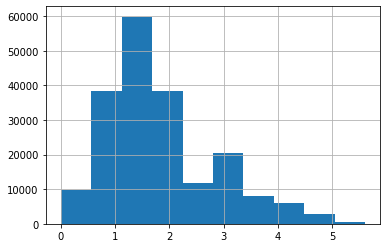

In [173]:
np.log(train['field12']).hist()

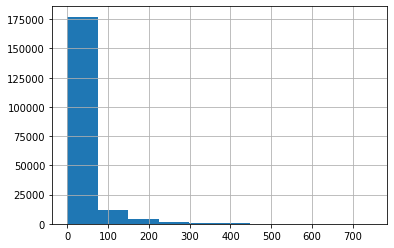

In [181]:
train['field13'].hist()

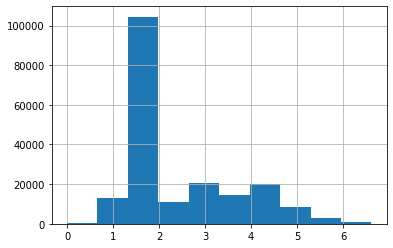

In [180]:
np.log(train['field13'] + 1).hist()

/home/fed/Projects/Competitions/sas/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


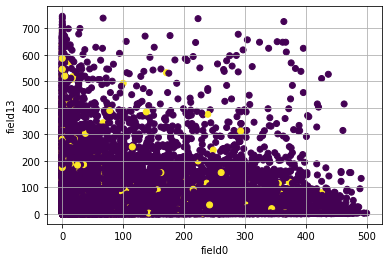

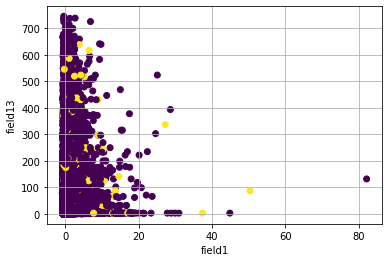

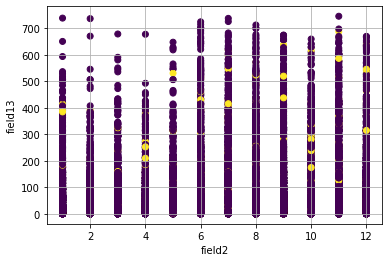

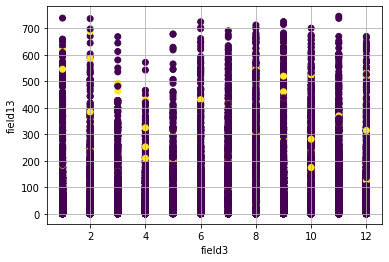

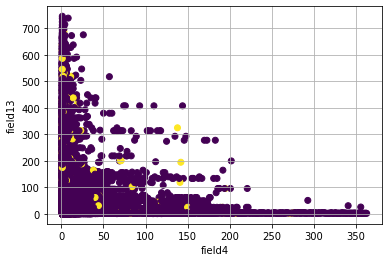

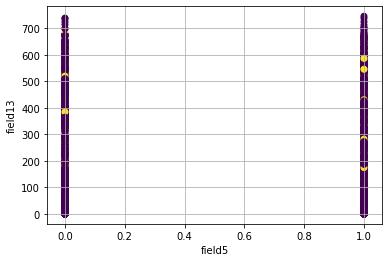

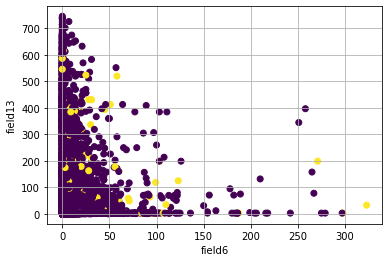

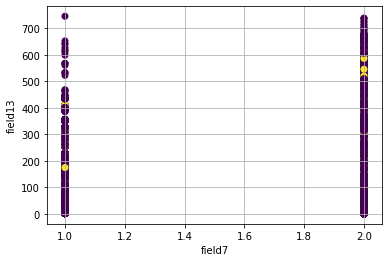

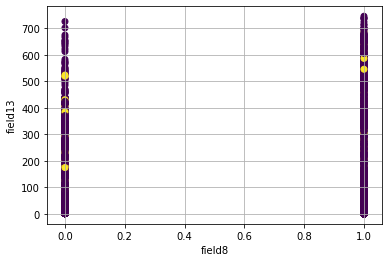

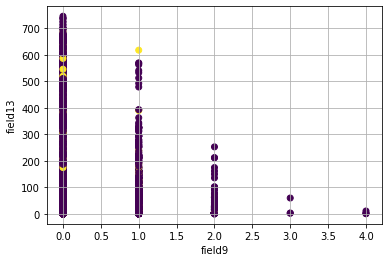

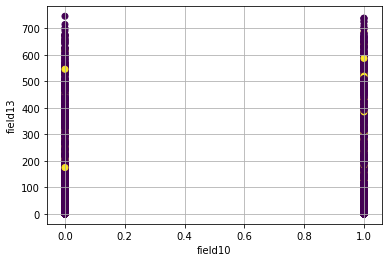

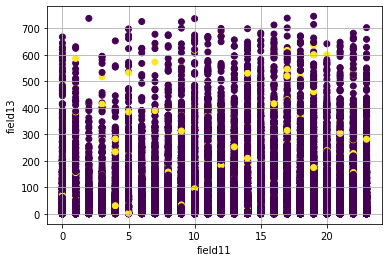

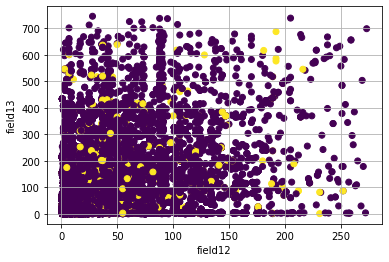

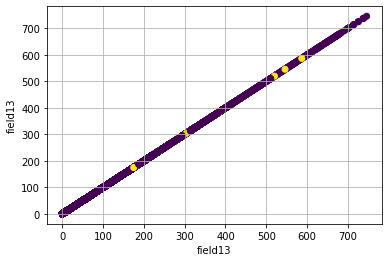

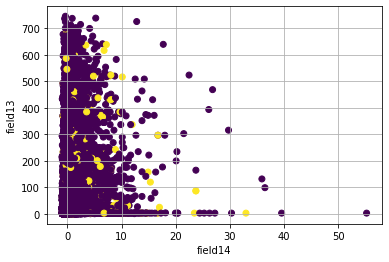

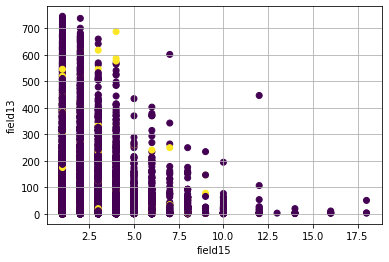

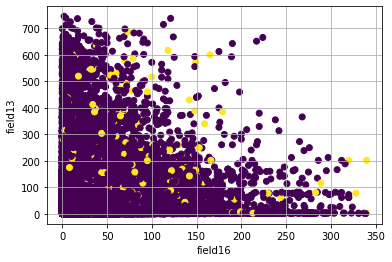

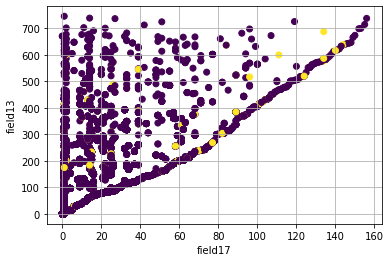

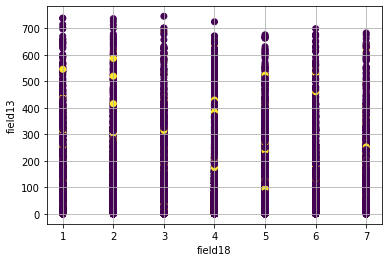

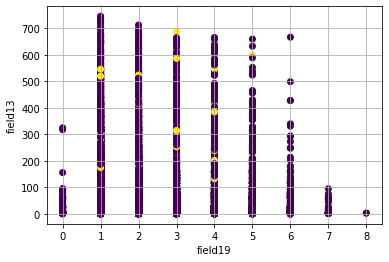

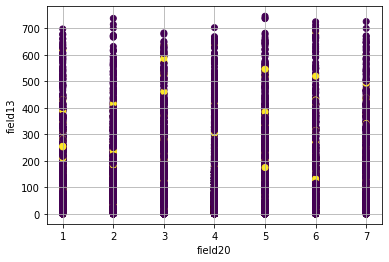

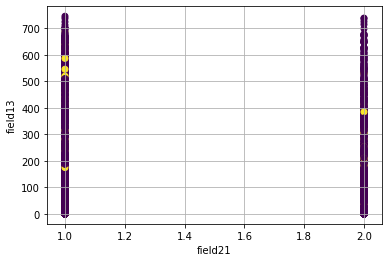

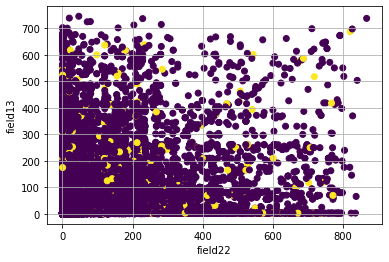

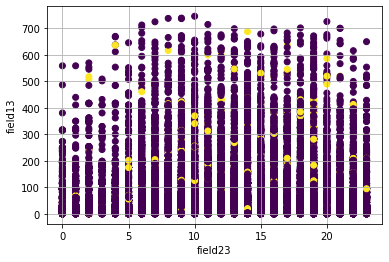

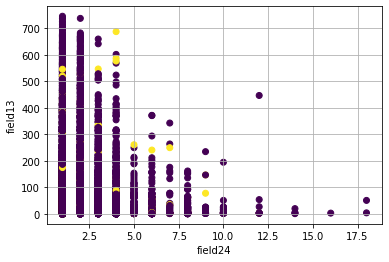

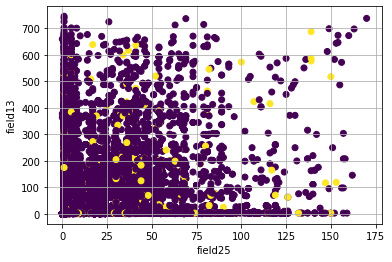

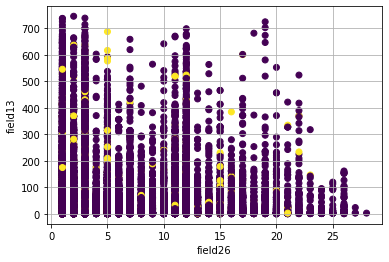

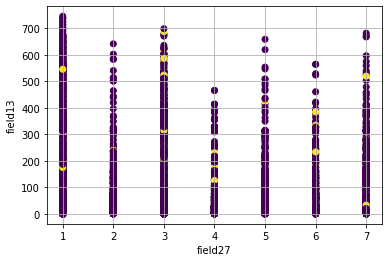

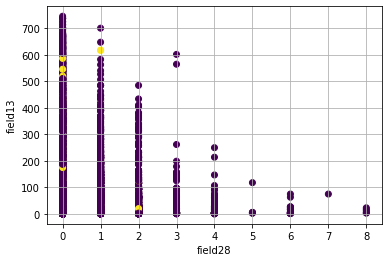

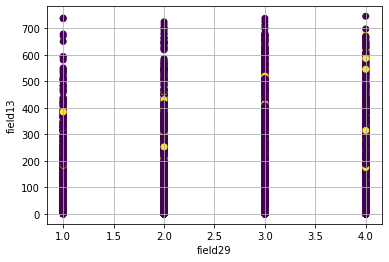

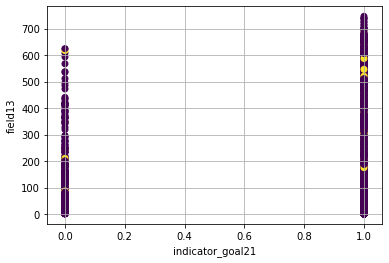

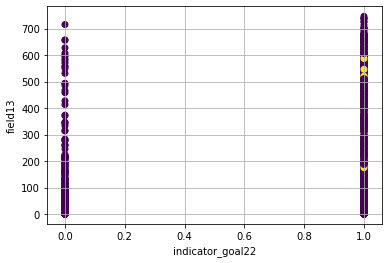

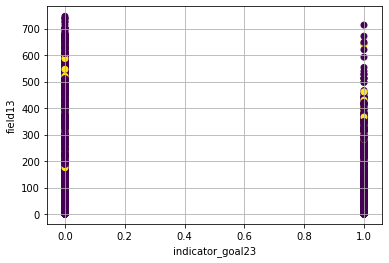

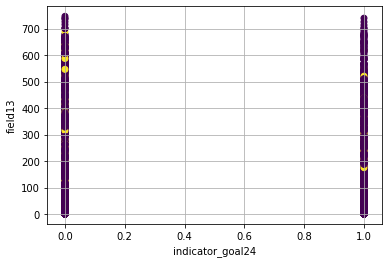

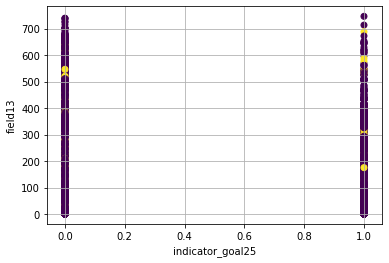

In [209]:
for col in all_features:
    plt.figure()
    plt.scatter(train[col], train['field13'], c=train['goal1'])
    plt.xlabel(col)
    plt.ylabel('field13')
    plt.grid()

In [197]:
train[train.userid == '13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa'] \
    .sort_values(['order_num'])[['field13', 'field17']]

,field13,field17
12210,3,1
54924,5,1
146009,3,1
179498,5,1
65589,3,1
...,...,...
188630,3,1
23194,3,1
152054,62,1
21777,3,1


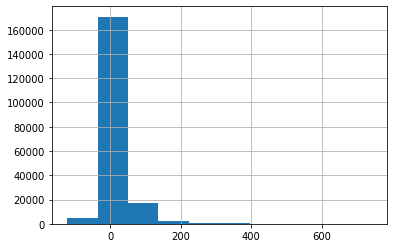

In [208]:
(train.field13 - 5*train.field17).hist()

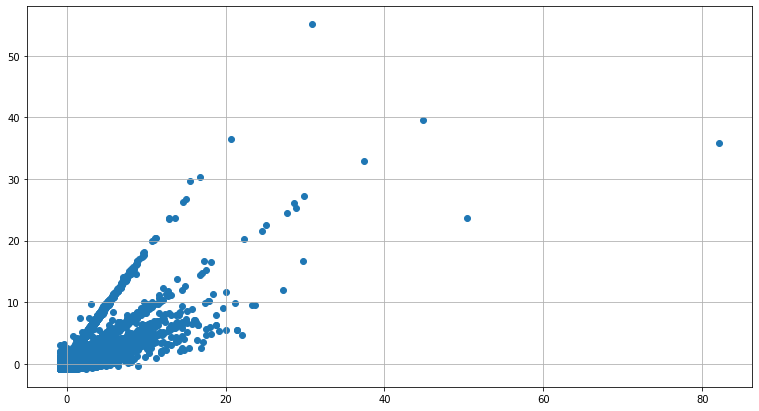

In [10]:
plt.figure(figsize=(13, 7))
plt.scatter(train['field1'], train['field14'])
plt.grid()
plt.show()

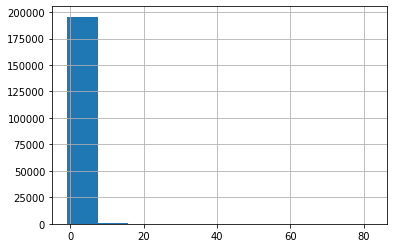

In [34]:
train['field1'].hist()

In [40]:
(train['field1'] / 0.07757136 + 1.10765391*10).describe()

count    1.960560e+05
mean     1.108830e+01
std      1.301577e+01
min     -5.952749e-11
25%      5.000000e+00
50%      8.000000e+00
75%      1.300000e+01
max      1.070000e+03
Name: field1, dtype: float64

/home/fed/Projects/Competitions/sas/venv/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


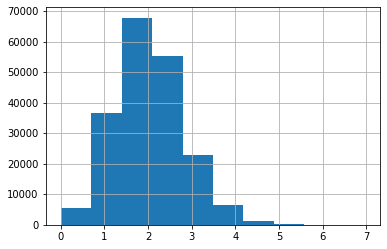

In [38]:
np.log(train['field1'] / 0.07757136 + 1.10765391*10).hist()

In [43]:
def anti_man_max(x_hat, x_min, x_max):
    return x_min + x_hat * (x_max - x_min)

In [26]:
field1 = np.sort(train['field1'].unique())

In [33]:
field1

array([-8.59222202e-01, -7.81650841e-01, -7.04079480e-01, -6.26508119e-01,
       -5.48936759e-01, -4.71365398e-01, -3.93794037e-01, -3.16222676e-01,
       -2.38651315e-01, -1.61079954e-01, -8.35085932e-02, -5.93723235e-03,
        7.16341285e-02,  1.49205489e-01,  2.26776850e-01,  3.04348211e-01,
        3.81919572e-01,  4.59490933e-01,  5.37062294e-01,  6.14633655e-01,
        6.92205016e-01,  7.69776376e-01,  8.47347737e-01,  9.24919098e-01,
        1.00249046e+00,  1.08006182e+00,  1.15763318e+00,  1.23520454e+00,
        1.31277590e+00,  1.39034726e+00,  1.46791862e+00,  1.54548999e+00,
        1.62306135e+00,  1.70063271e+00,  1.77820407e+00,  1.85577543e+00,
        1.93334679e+00,  2.01091815e+00,  2.08848951e+00,  2.16606087e+00,
        2.24363223e+00,  2.32120359e+00,  2.39877496e+00,  2.47634632e+00,
        2.55391768e+00,  2.63148904e+00,  2.70906040e+00,  2.78663176e+00,
        2.86420312e+00,  2.94177448e+00,  3.01934584e+00,  3.09691720e+00,
        3.17448856e+00,  

In [36]:
field1 / 0.07757136 + 1.10765391*10

array([-5.95274940e-11,  1.00000001e+00,  2.00000002e+00,  3.00000003e+00,
        4.00000005e+00,  5.00000006e+00,  6.00000007e+00,  7.00000008e+00,
        8.00000009e+00,  9.00000010e+00,  1.00000001e+01,  1.10000001e+01,
        1.20000001e+01,  1.30000001e+01,  1.40000002e+01,  1.50000002e+01,
        1.60000002e+01,  1.70000002e+01,  1.80000002e+01,  1.90000002e+01,
        2.00000002e+01,  2.10000002e+01,  2.20000003e+01,  2.30000003e+01,
        2.40000003e+01,  2.50000003e+01,  2.60000003e+01,  2.70000003e+01,
        2.80000003e+01,  2.90000003e+01,  3.00000003e+01,  3.10000004e+01,
        3.20000004e+01,  3.30000004e+01,  3.40000004e+01,  3.50000004e+01,
        3.60000004e+01,  3.70000004e+01,  3.80000004e+01,  3.90000004e+01,
        4.00000005e+01,  4.10000005e+01,  4.20000005e+01,  4.30000005e+01,
        4.40000005e+01,  4.50000005e+01,  4.60000005e+01,  4.70000005e+01,
        4.80000005e+01,  4.90000006e+01,  5.00000006e+01,  5.10000006e+01,
        5.20000006e+01,  

In [28]:
field1[1:] - field1[:-1]

array([ 0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07757136,
        0.07757136,  0.07757136,  0.07757136,  0.07757136,  0.07

In [90]:
import numpy as np

def plot_targets(feature):
  
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(train[train[target] == 0][feature].map(lambda x: np.log(x + 1)),kde=False)
    plt.grid()
    plt.subplot(1, 2, 2)
    sns.distplot(train[train[target] == 1][feature].map(lambda x: np.log(x + 1)), color='r',kde=False)
    plt.grid()
    plt.show();

In [91]:
def plot_feature(feature):
    n_unique = train[feature].unique().shape[0]
    print('-------------------------------------')
    print('{} has {} values'.format(feature, n_unique))
    
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(train[feature])
    plt.grid()
    plt.subplot(1, 2, 2)
    sns.distplot(test[feature], color='r')
    plt.grid()
    plt.show();